## Homework 3 :  Physics 403, S25
Aidan Meador-Woodruff (ameadorw@ur.rochester.edu)

Due: Friday 21 February, 2025

In [212]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import special 
import timeit

### Problem 1 : Poisson Distribution
*We wish to verify a few properties of the Poisson distribution,*
$$p(m|\lambda) = \frac{\lambda^m}{m!}e^{-\lambda}$$
---
*a).* We first wish to show that $\langle m \rangle = \lambda$. The expectation of a random variable is just the integral
$$\langle m \rangle = \sum_m m ~ p(m) $$
Hence, the expectation of $m$ for the Poisson distribution is just
$$\langle m \rangle = \sum_{m\geq 0} m \left(\frac{\lambda^m}{m!}e^{-\lambda}\right) =  \sum_{m\geq 0} \frac{\lambda^m}{(m-1)!}e^{-\lambda} $$
Pulling out a factor of $\lambda$ and $e^{-\lambda}$,
$$\langle m \rangle = \lambda e^{-\lambda }\sum_{m\geq 1} \frac{\lambda^{m-1}}{(m-1)!}$$
We apply a change of index, $n=m-1$, and get that 
$$\langle m \rangle = \lambda e^{-\lambda }\sum_{n\geq 0} \frac{\lambda^{n}}{n!}$$
This sum is exactly the Taylore expansion of the exponential function, giving us 
$$\boxed{\langle m \rangle = \lambda e^{-\lambda}e^{\lambda} = \lambda}$$
as desired.

*b).* Next, we wish to show that the variance ${\rm var}(m) = \lambda$, also. The variance is given by
$${\rm var }(m) = \langle m^2 \rangle - \langle m \rangle^2$$
We immediately know that $\langle m \rangle^2 = \lambda^2$, as we found $\langle m \rangle$ immediately above. So, we must find $\langle m^2 \rangle$. By definition, it is
$$\langle m^2 \rangle = \sum_{m} m^2~ p(m)$$
Hence, for the Poisson distribution,
$$\langle m^2 \rangle = \sum_{m \geq 0} m^2 \left(\frac{\lambda^m}{m!}e^{-\lambda}\right)  = \sum_{m \geq 0} \frac{m\lambda^m}{(m-1)!}e^{-\lambda}$$
We again pull out a factor of $\lambda$ and $e^{-\lambda}$ from the sum, seeing
$$\langle m^2 \rangle = \lambda e^{-\lambda}\sum_{m \geq 1} \frac{m\lambda^{m-1}}{(m-1)!}$$
We want to pull out another factor of $\lambda$. To do this, we make a convenient observation that $\frac{\lambda^{m-1}}{(m-1)!} - \frac{\lambda^{m-1}}{(m-1)!} = 0$, so we can add it with impunity to our sum. Our sum then becomes
$$\langle m^2 \rangle = \lambda e^{-\lambda} \sum_{m \geq 1} \frac{m\lambda^{m-1}}{(m-1)!} + \frac{\lambda^{m-1}}{(m-1)!} -  \frac{\lambda^{m-1}}{(m-1)!} $$
At first this seems remarkably useless. Regrouping our terms, though, we see it isn't
$$\langle m^2 \rangle = \lambda e^{-\lambda} \sum_{m\geq 1} \frac{(m-1)\lambda^{m-1}}{(m-1)!} + \frac{\lambda^{m-1}}{(m-1)!} $$
Splitting these sums, we see
$$\langle m^2 \rangle = \lambda e^{-\lambda} \sum_{m\geq 1} \frac{(m-1)\lambda^{m-1}}{(m-1)!} +\lambda e^{-\lambda} \sum_{m\geq 1} \frac{\lambda^{m-1}}{(m-1)!} $$
The first term can be simplified, 
$$\langle m^2 \rangle = \lambda e^{-\lambda} \sum_{m\geq 1} \frac{\lambda^{m-1}}{(m-2)!} +\lambda e^{-\lambda} \sum_{m\geq 1} \frac{\lambda^{m-1}}{(m-1)!} $$
Taking out another factor of $\lambda$,
$$\langle m^2 \rangle = \lambda^2 e^{-\lambda} \sum_{m\geq 2} \frac{\lambda^{m-2}}{(m-2)!} +\lambda e^{-\lambda} \sum_{m\geq 1} \frac{\lambda^{m-1}}{(m-1)!} $$
Making a change of index that $n=m-1$ and $k=m-2$, this is 
$$\langle m^2 \rangle = \lambda^2 e^{-\lambda} \sum_{k\geq 0}  \frac{\lambda^k}{k!}+\lambda e^{-\lambda} \sum_{m\geq 0} \frac{\lambda^{n}}{n!} $$
Both these sums are again just the Taylor seires of the exponential, so we get that 
$$\langle m^2 \rangle = \lambda^2 + \lambda $$
Hence, the variance of $m$ is
$$\boxed{{\rm var}(m) = (\lambda^2 + \lambda) - (\lambda^2) = \lambda}$$
as desired.

*c).* Lastly, we wish to show that if $x$ and $y$ are independent Poisson variables with $\lambda_x$ and $\lambda_y$. We wish to show that $z=x+y$ is Poisson with mean $\lambda_z = \lambda_x + \lambda_y$. We proceed by using the hint, and considering the joint probability. Since $x$ and $y$ are independent, we know their joint probability is the product
$$p(x,y|\lambda_x,\lambda_y) = p(x|\lambda_x) ~ p(y|\lambda_y)$$
We must sum over all $x+y=z$, so the probability of $z$ is just 
$$p(z|\lambda_z) = \sum_{x'=0}^z p(x=x')p(y=z-x')$$
Plugging in the PMF for the Poisson distribution, we see that 
$$p(z|\lambda_z) = \sum_{x'=0}^z e^{-\lambda_x}e^{-\lambda_y} \frac{\lambda_x^{x'}}{x'!} \frac{\lambda_y^{z-x'}}{(z-x')!}$$
We can pull out the exponentials, as they are independent of $x'$, and we see:
$$p(z|\lambda_z) = e^{-(\lambda_x + \lambda_y)}\sum_{x'=0}^z \frac{\lambda_x^{x'}}{x'!} \frac{\lambda_y^{z-x'}}{(z-x')!}$$
Recall the Binomial theorem, which states that 
$$(x+y)^n = \sum_{k=0}^n \frac{n!}{k! (n-k)!}x^{n-k}y^k$$
We notice here with some massaging that, if we divide by the convenient factor of 1, $z!/z!$, we get that,
$$p(z|\lambda_z) = \frac{1}{z!}e^{-(\lambda_x + \lambda_y)}\sum_{x'=0}^z \frac{z! \lambda_x^{x'}}{x'!} \frac{\lambda_y^{z-x'}}{(z-x')!}$$
We may now apply the Binomial theorem and we see that 
$$p(z|\lambda_z) = \frac{e^{-(\lambda_x + \lambda_y)}}{z!} (\lambda_x + \lambda_y)^z$$
With one final change of variable, we see this is 
$$p(z|\lambda_z) = \frac{e^{-\lambda_z}}{z!} \lambda_z^z$$
Which we can rest assured is Poisson, as desired.

### Problem 2 : Generating Gaussian Random Numbers
*We wish to generate Gaussian Random numbers in various ways, with $\mu=0$ and $\sigma^2=1$.*

---
*a).* We begin by applying the accept/reject method below. 

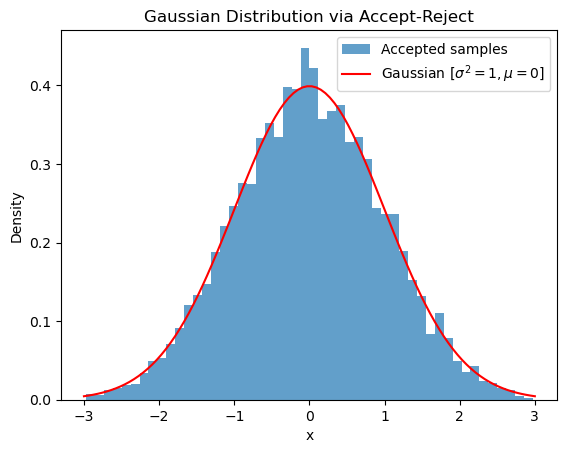

In [230]:
# 2a. Accept/Reject method

def gaussian_accept_reject(N=10000):
    samples = []
    M = 1.0  # Chosen to ensure the acceptance ratio is valid

    while len(samples) < N:
        # Sample from a uniform proposal distribution
        x_candidate = np.random.uniform(-3, 3)  # Truncate to reasonable range
        
        # Acceptance probability
        accept_prob = np.exp(-0.5 * x_candidate**2) / M
        if np.random.rand() < accept_prob:
            samples.append(x_candidate)

    return np.array(samples)

# Generate 10,000 Gaussian-distributed samples
samples = gaussian_accept_reject(10000)

# Plot histogram
plt.hist(samples, bins=50, density=True, alpha=0.7, label='Accepted samples')

# Overlay true Gaussian curve
x = np.linspace(-3, 3, 100)
plt.plot(x, (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2), 'r', label=r"Gaussian [$\sigma^2 =1, \mu=0$]")
plt.legend()
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Gaussian Distribution via Accept-Reject")
plt.show()


*b).* The CLT method is below.

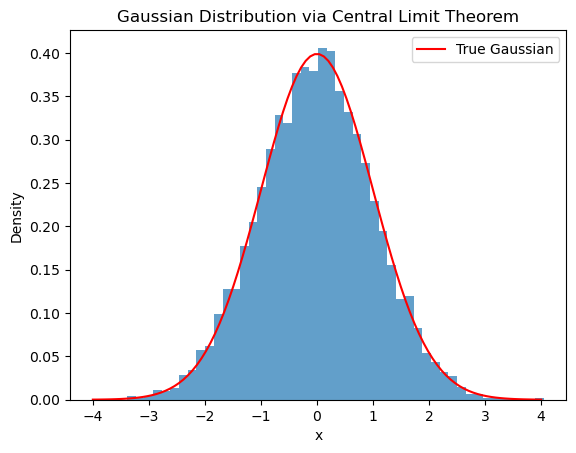

In [ ]:
# 2b. Central-Limit Theorem method

def gaussian_clt(N=10000, k=12):
    """Generate N Gaussian-distributed numbers using the Central Limit Theorem."""
    # Sum k uniform random numbers and normalize
    samples = np.sum(np.random.uniform(0, 1, (N, k)), axis=1) - k / 2
    return samples

# Generate 10,000 Gaussian-distributed samples
samples = gaussian_clt(10000)

# Plot histogram
plt.hist(samples, bins=50, density=True, alpha=0.7)

# Overlay true Gaussian curve
x = np.linspace(-4, 4, 100)
plt.plot(x, (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2), 'r', label="True Gaussian")
plt.legend()
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Gaussian Distribution via Central Limit Theorem")
plt.show()


*c).* The Box-Muller method is below.

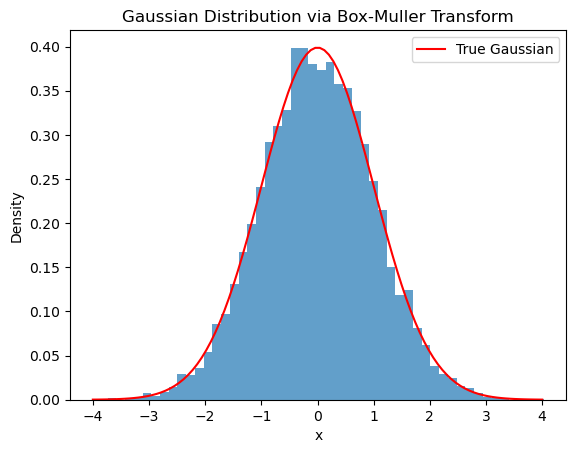

In [238]:
#2c. Box-Muller algorithm.
def box_muller(N=10000):
    """Generate N Gaussian-distributed numbers using the Box-Muller transform."""
    # Generate N/2 pairs of uniform random numbers
    U1 = np.random.uniform(0, 1, N//2)
    U2 = np.random.uniform(0, 1, N//2)

    # Apply Box-Muller transform
    R = np.sqrt(-2 * np.log(U1))
    theta = 2 * np.pi * U2
    Z1 = R * np.cos(theta)
    Z2 = R * np.sin(theta)
    return Z1,Z2

# Generate 10,000 Gaussian-distributed samples
samples = np.concatenate(box_muller(10000))

# Plot histogram
plt.hist(samples, bins=50, density=True, alpha=0.7)

# Overlay true Gaussian curve
x = np.linspace(-4, 4, 100)
plt.plot(x, (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2), 'r', label="True Gaussian")
plt.legend()
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Gaussian Distribution via Box-Muller Transform")
plt.show()

*d).* The independence of $x,y$ using the Box-Muller algorithm is below.

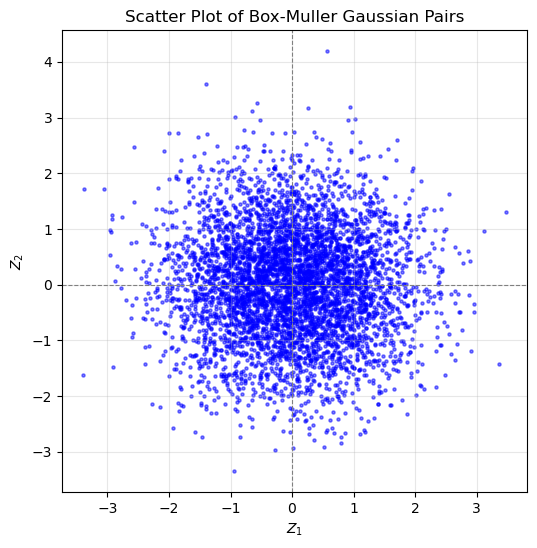

In [237]:
# 2d. Independence of x,y pairs in Box-Muller

Z1, Z2 = box_muller(10000)

# Create a scatter plot
plt.figure(figsize=(6,6))
plt.scatter(Z1, Z2, alpha=0.5, s=5, color='blue')

# Plot formatting
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel("$Z_1$")
plt.ylabel("$Z_2$")
plt.title("Scatter Plot of Box-Muller Gaussian Pairs")
plt.grid(alpha=0.3)
plt.show()


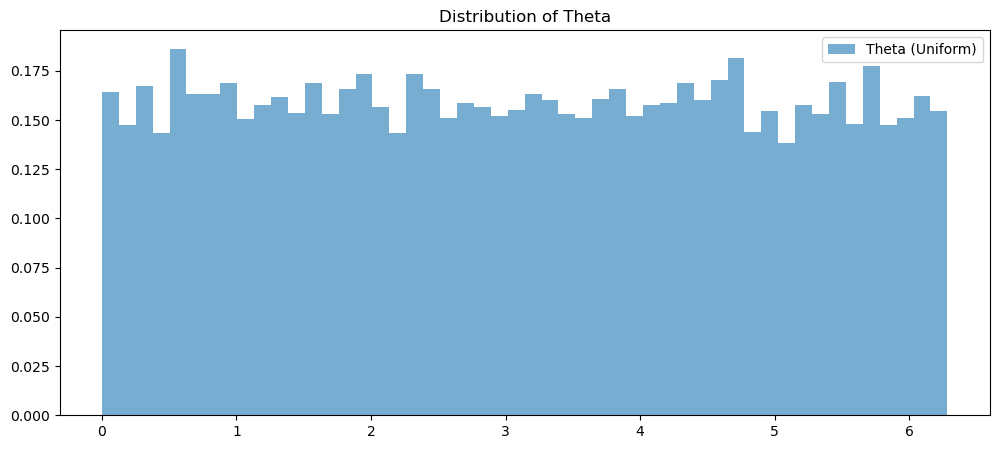

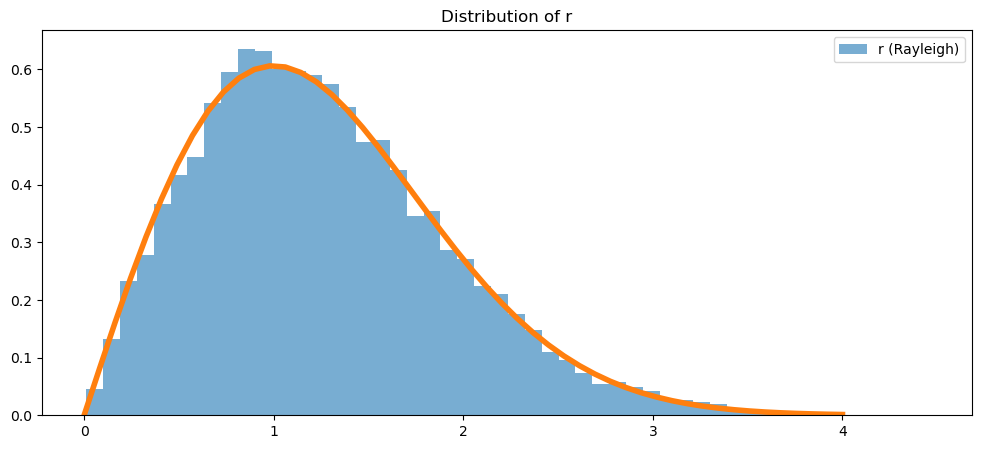

In [239]:
# 2e. Polar Box-Muller 
def box_muller(n):
    """Generate n pairs of independent standard normal random variables using the Box-Müller transform."""
    u1 = np.random.uniform(0, 1, n)
    u2 = np.random.uniform(0, 1, n)
    
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    
    return z1, z2

# Generate 10,000 pairs
n_samples = 10000
x, y = box_muller(n_samples)

# Modify function to return polar variables
def box_muller_polar(n):
    """Generate n pairs of independent random variables in polar form."""
    u1 = np.random.uniform(0, 1, n)
    u2 = np.random.uniform(0, 1, n)
    
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    
    return r, theta

# Generate polar variables
r, theta = box_muller_polar(n_samples)
x = np.linspace(0,4,50)
# Plot histograms
plt.figure(figsize=(12, 5))
plt.hist(theta, bins=50, density=True, alpha=0.6, label='Theta (Uniform)')
plt.legend()
plt.title("Distribution of Theta")
plt.show()

plt.figure(figsize=(12, 5))
plt.hist(r, bins=50, density=True, alpha=0.6, label='r (Rayleigh)')
plt.plot(x, x *np.exp(-(x)**2/2), linewidth=4)
plt.legend()
plt.title("Distribution of r")
plt.show()


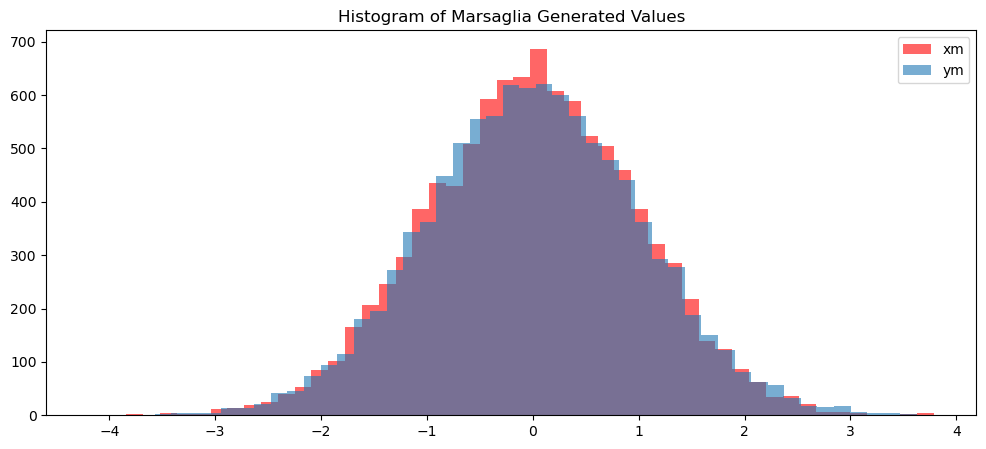

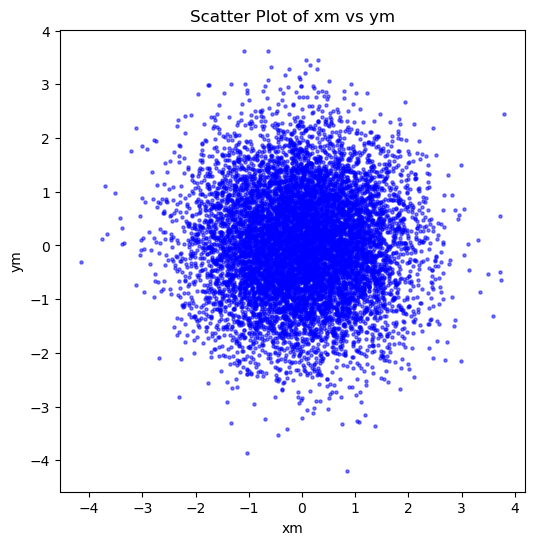

In [246]:
#2f. Marsaglia method 
def marsaglia(n):
    """Generate n pairs of independent standard normal random variables using the Marsaglia method."""
    z1_list, z2_list = [], []
    while len(z1_list) < n:
        u1, u2 = np.random.uniform(-1, 1, 2)
        s = u1**2 + u2**2
        if 0 < s < 1:
            factor = np.sqrt(-2 * np.log(s) / s)
            z1_list.append(u1 * factor)
            z2_list.append(u2 * factor)
    return np.array(z1_list[:n]), np.array(z2_list[:n])

# Generate 10,000 pairs using Marsaglia
xm, ym = marsaglia(n_samples)

# Plot histogram for Marsaglia method
plt.figure(figsize=(12, 5))
plt.hist(xm, bins=50, alpha=0.6, label='xm',color='red')
plt.hist(ym, bins=50, alpha=0.6, label='ym')
plt.legend()
plt.title("Histogram of Marsaglia Generated Values")
plt.show()

# Scatter plot to check independence for Marsaglia method
plt.figure(figsize=(6, 6))
plt.scatter(xm, ym, alpha=0.5, s=5, color='blue')
plt.xlabel("xm")
plt.ylabel("ym")
plt.title("Scatter Plot of xm vs ym")
plt.show()

Clearly, these are independent and Gaussian-distributed.

*g).* Below are the times to run of each above method and $\texttt{numpy}$'s built in normal distribtuion.

In [ ]:
#2g. Timing the methods using timeit
n_samples = 10000
bm_time = timeit.timeit(lambda: box_muller_polar(n_samples), number=100)
ms_time = timeit.timeit(lambda: marsaglia(n_samples), number=100)
builtin_time = timeit.timeit(lambda: np.random.normal(0,1,n_samples), number=100)
clt_time = timeit.timeit(lambda: gaussian_clt(n_samples), number=100)
accrej_time = timeit.timeit(lambda: gaussian_accept_reject(n_samples),number=100)


In [241]:
print(f"CLT Gaussian time (100 runs): {clt_time:.6f} seconds")
print(f"Acc/Rej Gaussian time (100 runs): {accrej_time:.6f} seconds")
print(f"Box-Müller method time (100 runs): {bm_time:.6f} seconds")
print(f"Marsaglia method time (100 runs): {ms_time:.6f} seconds")
print(f"Built-in numpy Normal distribution time (100 runs): {builtin_time:.6f} seconds")

CLT Gaussian time (100 runs): 0.033823 seconds
Acc/Rej Gaussian time (100 runs): 2.870221 seconds
Box-Müller method time (100 runs): 0.019233 seconds
Marsaglia method time (100 runs): 2.249387 seconds
Built-in numpy Normal distribution time (100 runs): 0.010757 seconds


The accept/reject seems to be the slowest, while the built-in Numpy method is fastest. When we say "slow" we mean seconds and not milliseconds or smaller. The accept/reject method is fast on a human time scale, but is actually almost 300 times slower than more efficient methods.

### Problem 3 : Monte Carlo Integration
*We attempt Monte Carlo integration and error analysis on the Gamma function for various values and number of data points.*

---
*a).* We first wish to write a function to compute $\Gamma(z)$ and the uncertainty using Monte Carlo integration. The code for this is below. We make a change of variables...

In [81]:
def Gamma(z, N):
    '''Function to approximate the Gamma function integral.
    INPUTS
    z : point to evaluate Gammma (float)
    N : number of samples (integer)
    OUTPUTS
    Gamma(z) : approximate Gamma function of z (float)
    Delta G : approximate uncertainty of Gamma function of z (float)
    '''
    
    # Integral bounds
    a = 0
    b = 1
    # u subbed random variable
    u = np.random.uniform(a,b, N)

    # Integrand
    fi= np.exp(-(1-u)/u) * ((1-u)/u)**(z-1) * u**(-2)

    # Expectation of f(x)
    f = 1/N * np.sum(fi)
    # Expectation of f^2(x)
    f2 = 1/N * np.sum(fi**2)
    variance= f2 - f**2

    # Error
    deltaG = (b-a) * np.sqrt(variance/N)

    return (b-a)*f, deltaG

*b).* Next, we wish to compute $\Gamma(5)$ and $\Gamma(\pi)$ with $100$, $10^4$, and $10^6$ samples with uncertainties. We do this in the cell below. 

In [62]:
G5100, DeltaG5100 = Gamma(5,100)
G51e4, DeltaG51e4 = Gamma(5,int(1e4))
G51e6, DeltaG51e6 = Gamma(5,int(1e6))

print(f'The value of Gamma(5) for 100 samples is {G5100:0.6f} with an uncertainty of {DeltaG5100:0.6f}')
print(f'The value of Gamma(5) for 1e4 samples is {G51e4:0.6f} with an uncertainty of {DeltaG51e4:0.6f}')
print(f'The value of Gamma(5) for 1e6 samples is {G51e6:0.6f} with an uncertainty of {DeltaG51e6:0.6f}')

The value of Gamma(5) for 100 samples is 26.145927 with an uncertainty of 4.761633
The value of Gamma(5) for 1e4 samples is 23.526867 with an uncertainty of 0.439748
The value of Gamma(5) for 1e6 samples is 23.995244 with an uncertainty of 0.044553


Pretty good, given $\Gamma(5) =24$. Next, for $\Gamma(\pi)$:

In [63]:
Gpi100, DeltaGpi100 = Gamma(np.pi,100)
Gpi1e4, DeltaGpi1e4 = Gamma(np.pi,int(1e4))
Gpi1e6, DeltaGpi1e6 = Gamma(np.pi,int(1e6))

print(f'The value of Gamma(pi) for 100 samples is {Gpi100:0.6f} with an uncertainty of {DeltaGpi100:0.6f}')
print(f'The value of Gamma(pi) for 1e4 samples is {Gpi1e4:0.6f} with an uncertainty of {DeltaGpi1e4:0.6f}')
print(f'The value of Gamma(pi) for 1e6 samples is {Gpi1e6:0.6f} with an uncertainty of {DeltaGpi1e6:0.6f}')
print(f'The real value of Gamma(pi) is about {special.gamma(np.pi):0.6f}')

The value of Gamma(pi) for 100 samples is 2.553950 with an uncertainty of 0.290389
The value of Gamma(pi) for 1e4 samples is 2.297369 with an uncertainty of 0.029568
The value of Gamma(pi) for 1e6 samples is 2.287555 with an uncertainty of 0.002942
The real value of Gamma(pi) is about 2.288038


Again, not too bad!

*c).* Lastly, we want to compute $\Gamma(90)$ at $10^6$ samples.

In [72]:
G90, DeltaG90 = Gamma(90,int(1e6))

/var/folders/1l/378_p_7n3w1cddmhf1mkkw2h0000gn/T/ipykernel_95191/3791406343.py:18: RuntimeWarning: overflow encountered in power
  fi= np.exp(-(1-u)/u) * ((1-u)/u)**(z-1) * u**(-2)
/var/folders/1l/378_p_7n3w1cddmhf1mkkw2h0000gn/T/ipykernel_95191/3791406343.py:18: RuntimeWarning: invalid value encountered in multiply
  fi= np.exp(-(1-u)/u) * ((1-u)/u)**(z-1) * u**(-2)


Uh oh! That's not good. We encounter an overflow in our code. This is due to our sampling being not well-suited to our function. One way to remedy this is to use importance sampling, which means that we change the distribution of our random variable to match. By instead sampling an exponential distribution instead of a uniform one, this will fix our issue.

In [174]:
def GammaSampling(z, N):
    '''Function to approximate the Gamma function integral, using exponential sampling.
    INPUTS
    z : point to evaluate Gammma (float)
    N : number of samples (integer)
    OUTPUTS
    Gamma(z) : approximate Gamma function of z (float)
    Delta G : approximate uncertainty of Gamma function of z (float)
    '''

    # Try a different sampling.
    x = np.random.exponential(z, N)

    # Weighted integrand. The weight comes from choosing the exponential distribution.
    f_raw  = x**(z-1) * np.exp(-x)
    weight = 1/z * np.exp(-x/z)
    fi = f_raw/weight

    # Expectation of f(x)
    f =  1/N*np.sum(fi)
    # Expectation of f^2(x)
    f2 =  1/N*np.sum(fi**2)
    variance= f2 - f**2

    # Error
    deltaG =  np.sqrt(variance/N)

    return f, deltaG

G90, DeltaG90 = GammaSampling(90,int(1e6))
print(f'The value of Gamma(90) for 1e6 samples is {G90:0.6g} with an uncertainty of {DeltaG90:0.6g}')
print(f'Scipy evaluates Gamma(90) to be {special.gamma(90):0.6g}')



The value of Gamma(90) for 1e6 samples is 1.65196e+136 with an uncertainty of 4.13992e+133
Scipy evaluates Gamma(90) to be 1.6508e+136


Not too bad an approximation! The uncertainty is gigantic, but given that $\Gamma(90)$ is gigantic-er (definitely a word, I promise), it is reasonable. There are other ways to do this, as well. I think looking at the integral in log space would probably have worked. My immediate first thought was to just use a package like $\texttt{mpmath}$ to change the floating point precision to be arbitrarily large, like 128 or 256 bit. While I think this would have worked, I felt it was not in the spirit of the problem.


A funny anecdote, I actually had to use the exact method in my code above while writing a paper to compute an egregious integral of electron radiation density in the early universe (which was very high, of course), and it clicked while writing this that I had indeed done it before!